In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
gt = pd.read_csv(open("ground_truth.out",'rb'), header=None, delim_whitespace=True)
lr = pd.read_csv(open("LR.out",'rb'), header=None, delim_whitespace=True)
raw = pd.read_csv(open("raw.out",'rb'), header=None, delim_whitespace=True)
raw_l = raw[raw[0] == "L"]
raw_r = raw[raw[0] == "R"]
nis_laser = pd.read_csv(open("NIS_laser.out",'rb'), header=None, delim_whitespace=True)
nis_radar = pd.read_csv(open("NIS_radar.out",'rb'), header=None, delim_whitespace=True)

In [3]:
# hard coded RMSE values: px, py, vx, vy
LR_rmse = [0.0640, 0.0835, 0.3307, 0.2131]

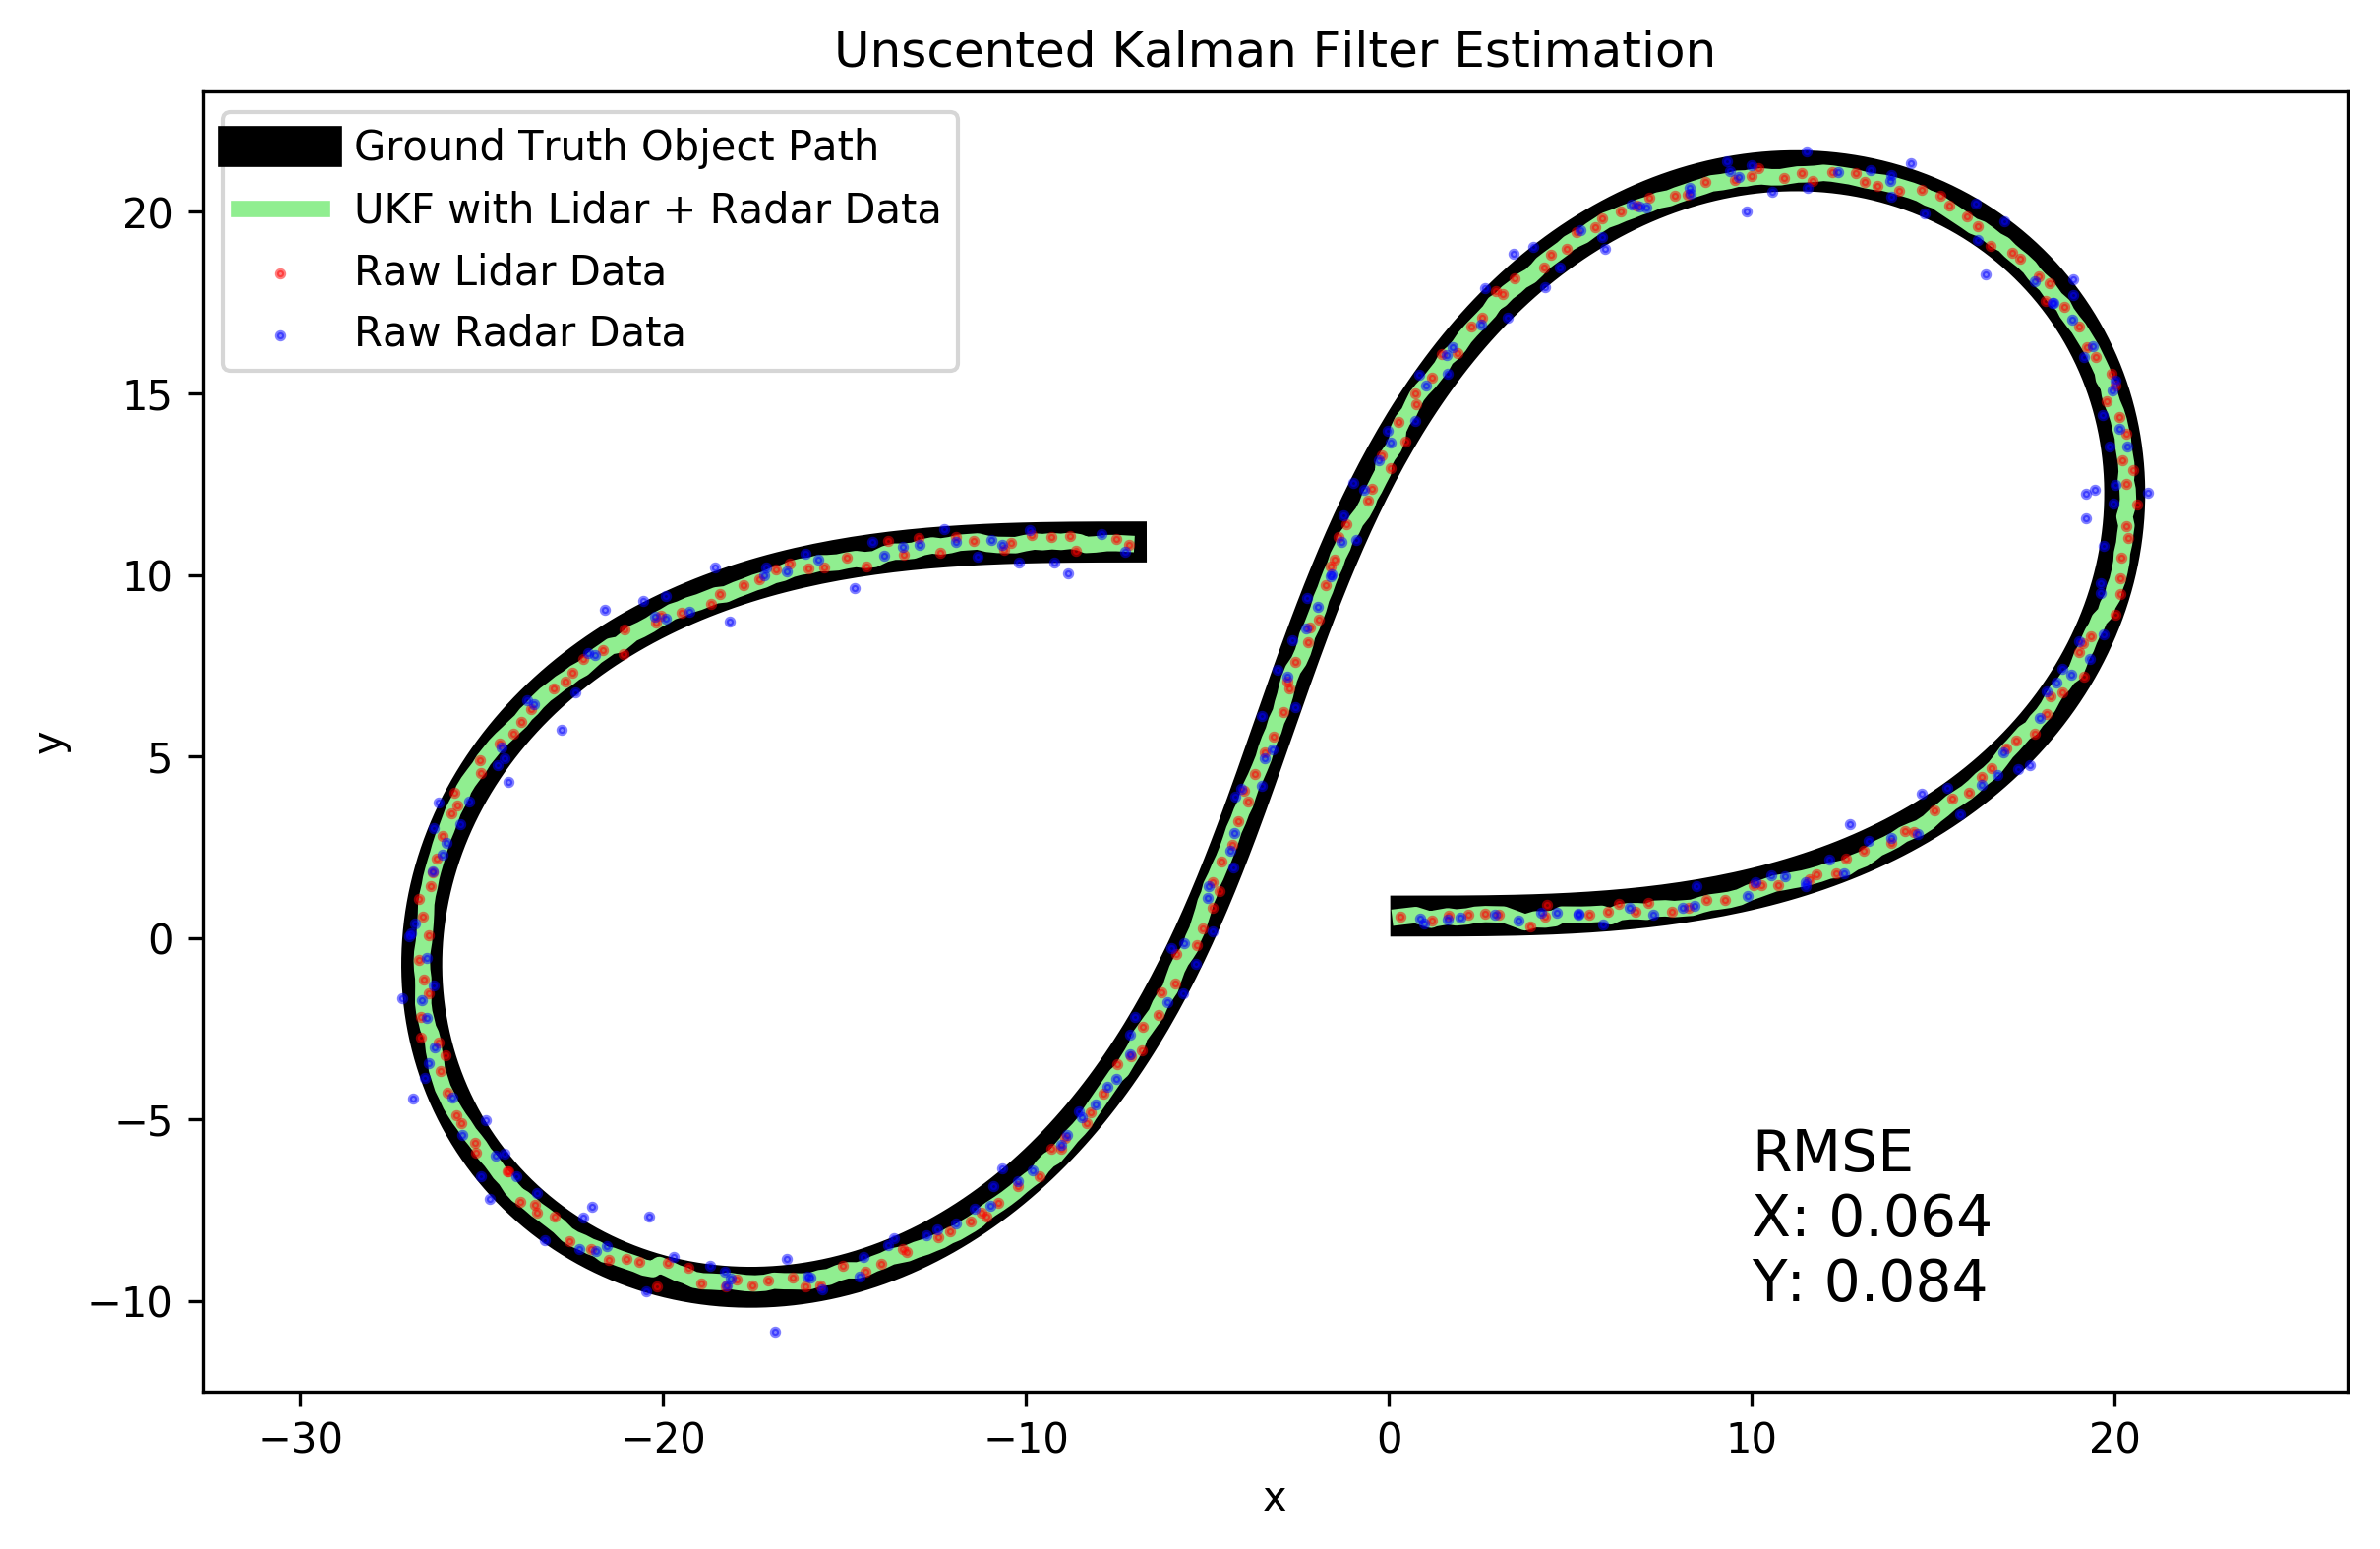

In [4]:
gt_color = 'black'
gt_label = "Ground Truth Object Path"
rmse_string = "RMSE\n{0}: {2:.3f}\n{1}: {3:.3f}"

x_label = "x"
y_label = "y"

f, ax1 = plt.subplots(1, 1, figsize=(8, 5), dpi=300)
f.tight_layout()

ax1.plot(gt.iloc[:,0], gt.iloc[:,1], zorder=1, c=gt_color, lw=10, label=gt_label)
ax1.plot(lr.iloc[:,0], lr.iloc[:,1], zorder=2, c='lightgreen', lw=4, label="UKF with Lidar + Radar Data")
ax1.scatter(raw_l.iloc[:,1], raw_l.iloc[:,2], zorder=3, c="red", s=3, alpha=0.5, label="Raw Lidar Data")
ax1.scatter(raw_r.iloc[:,1], raw_r.iloc[:,2], zorder=3, c="blue", s=3, alpha=0.5, label="Raw Radar Data")
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
ax1.set_title("Unscented Kalman Filter Estimation")
ax1.text(10, -10, rmse_string.format("X", "Y", LR_rmse[0], LR_rmse[1]), fontsize=14)
ax1.legend()

ax1.axis('equal')

plt.show()

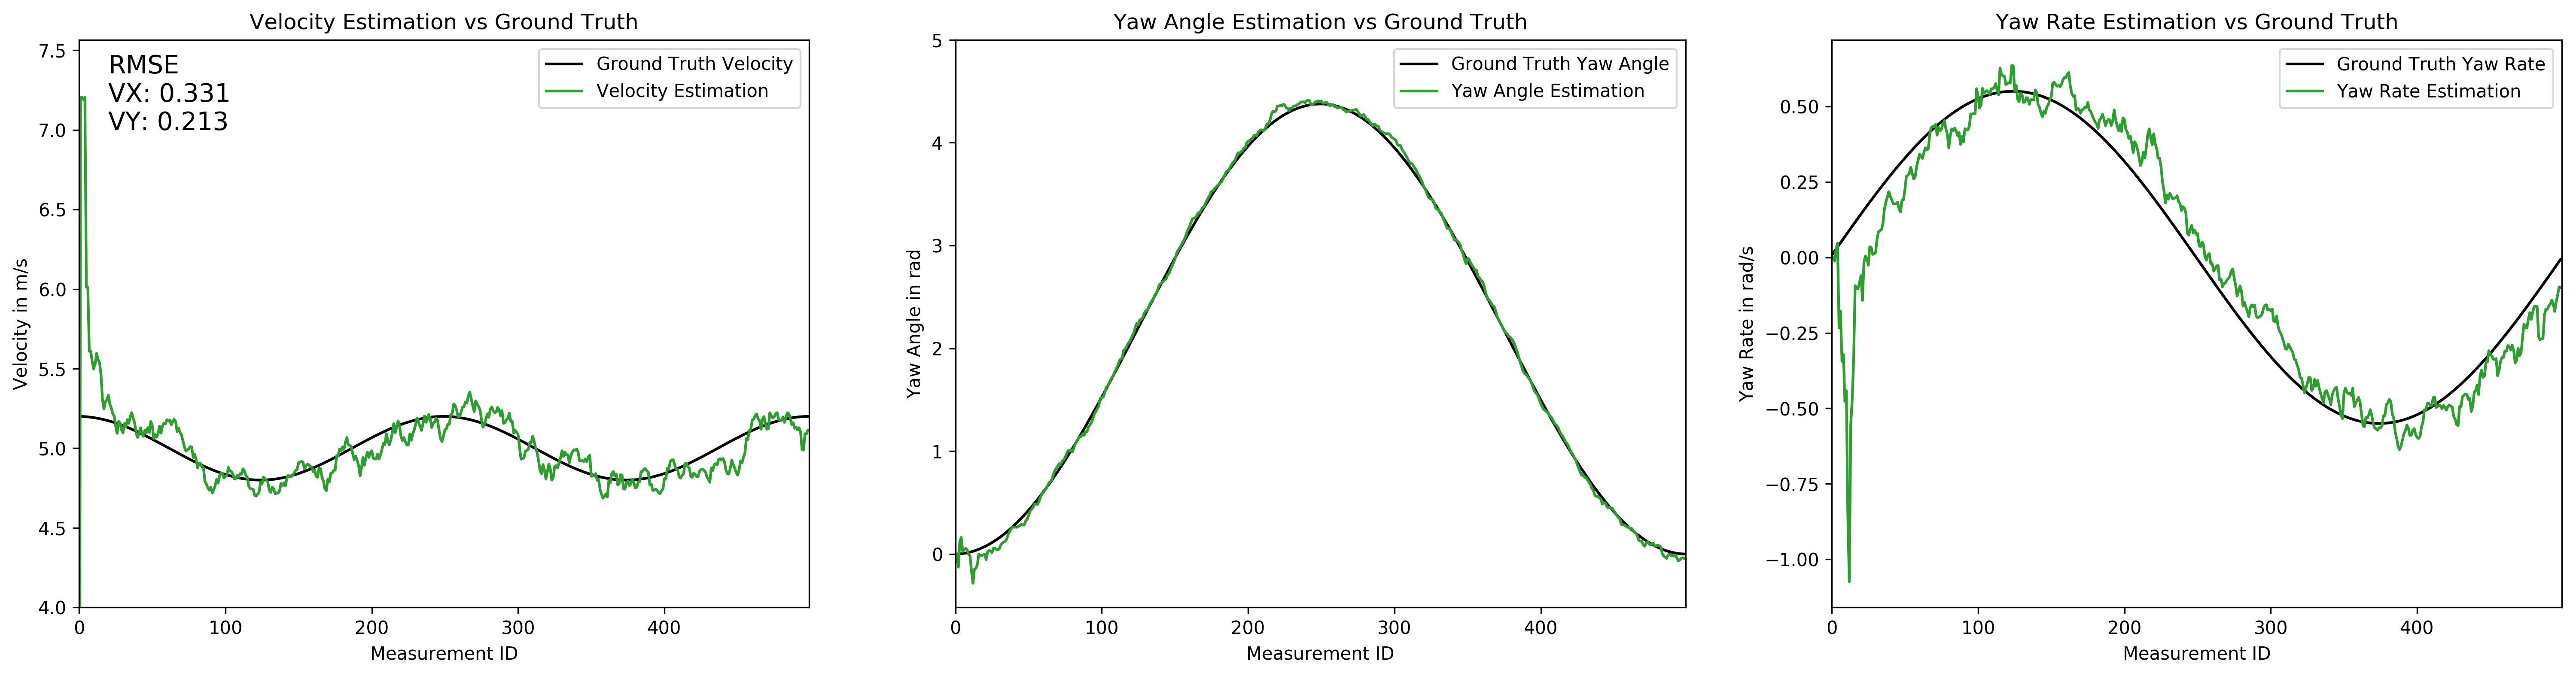

In [5]:
color_cycle = mpl.rcParams['axes.prop_cycle']()
blue = next(color_cycle)['color']
orange = next(color_cycle)['color']
green = next(color_cycle)['color']

x_label = "Measurement ID"

x = range(len(gt))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), dpi=300)
f.tight_layout()

ax1.plot(x, np.divide(gt.iloc[:,2], np.cos(gt.iloc[:,4])), c=gt_color, label="Ground Truth Velocity")
ax1.plot(x, lr.iloc[:,2], c=green, label="Velocity Estimation")
ax1.set_xlim(0,x[-1]+1)
y_lim = ax1.get_ylim()
ax1.set_ylim(4, y_lim[1])
ax1.set_xlabel(x_label)
ax1.set_ylabel("Velocity in m/s")
ax1.set_title("Velocity Estimation vs Ground Truth")
ax1.text(20, 7, rmse_string.format("VX", "VY", LR_rmse[2], LR_rmse[3]), fontsize=14)
ax1.legend()

ax2.plot(x, gt.iloc[:,4], c=gt_color, label="Ground Truth Yaw Angle")
ax2.plot(x, lr.iloc[:,3], c=green, label="Yaw Angle Estimation")
ax2.set_xlim(0,x[-1]+1)
y_lim = ax2.get_ylim()
ax2.set_ylim(y_lim[0], 5)
ax2.set_xlabel(x_label)
ax2.set_ylabel("Yaw Angle in rad")
ax2.set_title("Yaw Angle Estimation vs Ground Truth")
ax2.legend()

ax3.plot(x, gt.iloc[:,5], c=gt_color, label="Ground Truth Yaw Rate")
ax3.plot(x, lr.iloc[:,4], c=green, label="Yaw Rate Estimation")
ax3.set_xlim(0,x[-1]+1)
ax3.set_xlabel(x_label)
ax3.set_ylabel("Yaw Rate in rad/s")
ax3.set_title("Yaw Rate Estimation vs Ground Truth")
ax3.legend()

plt.subplots_adjust(wspace=0.2)
plt.show()

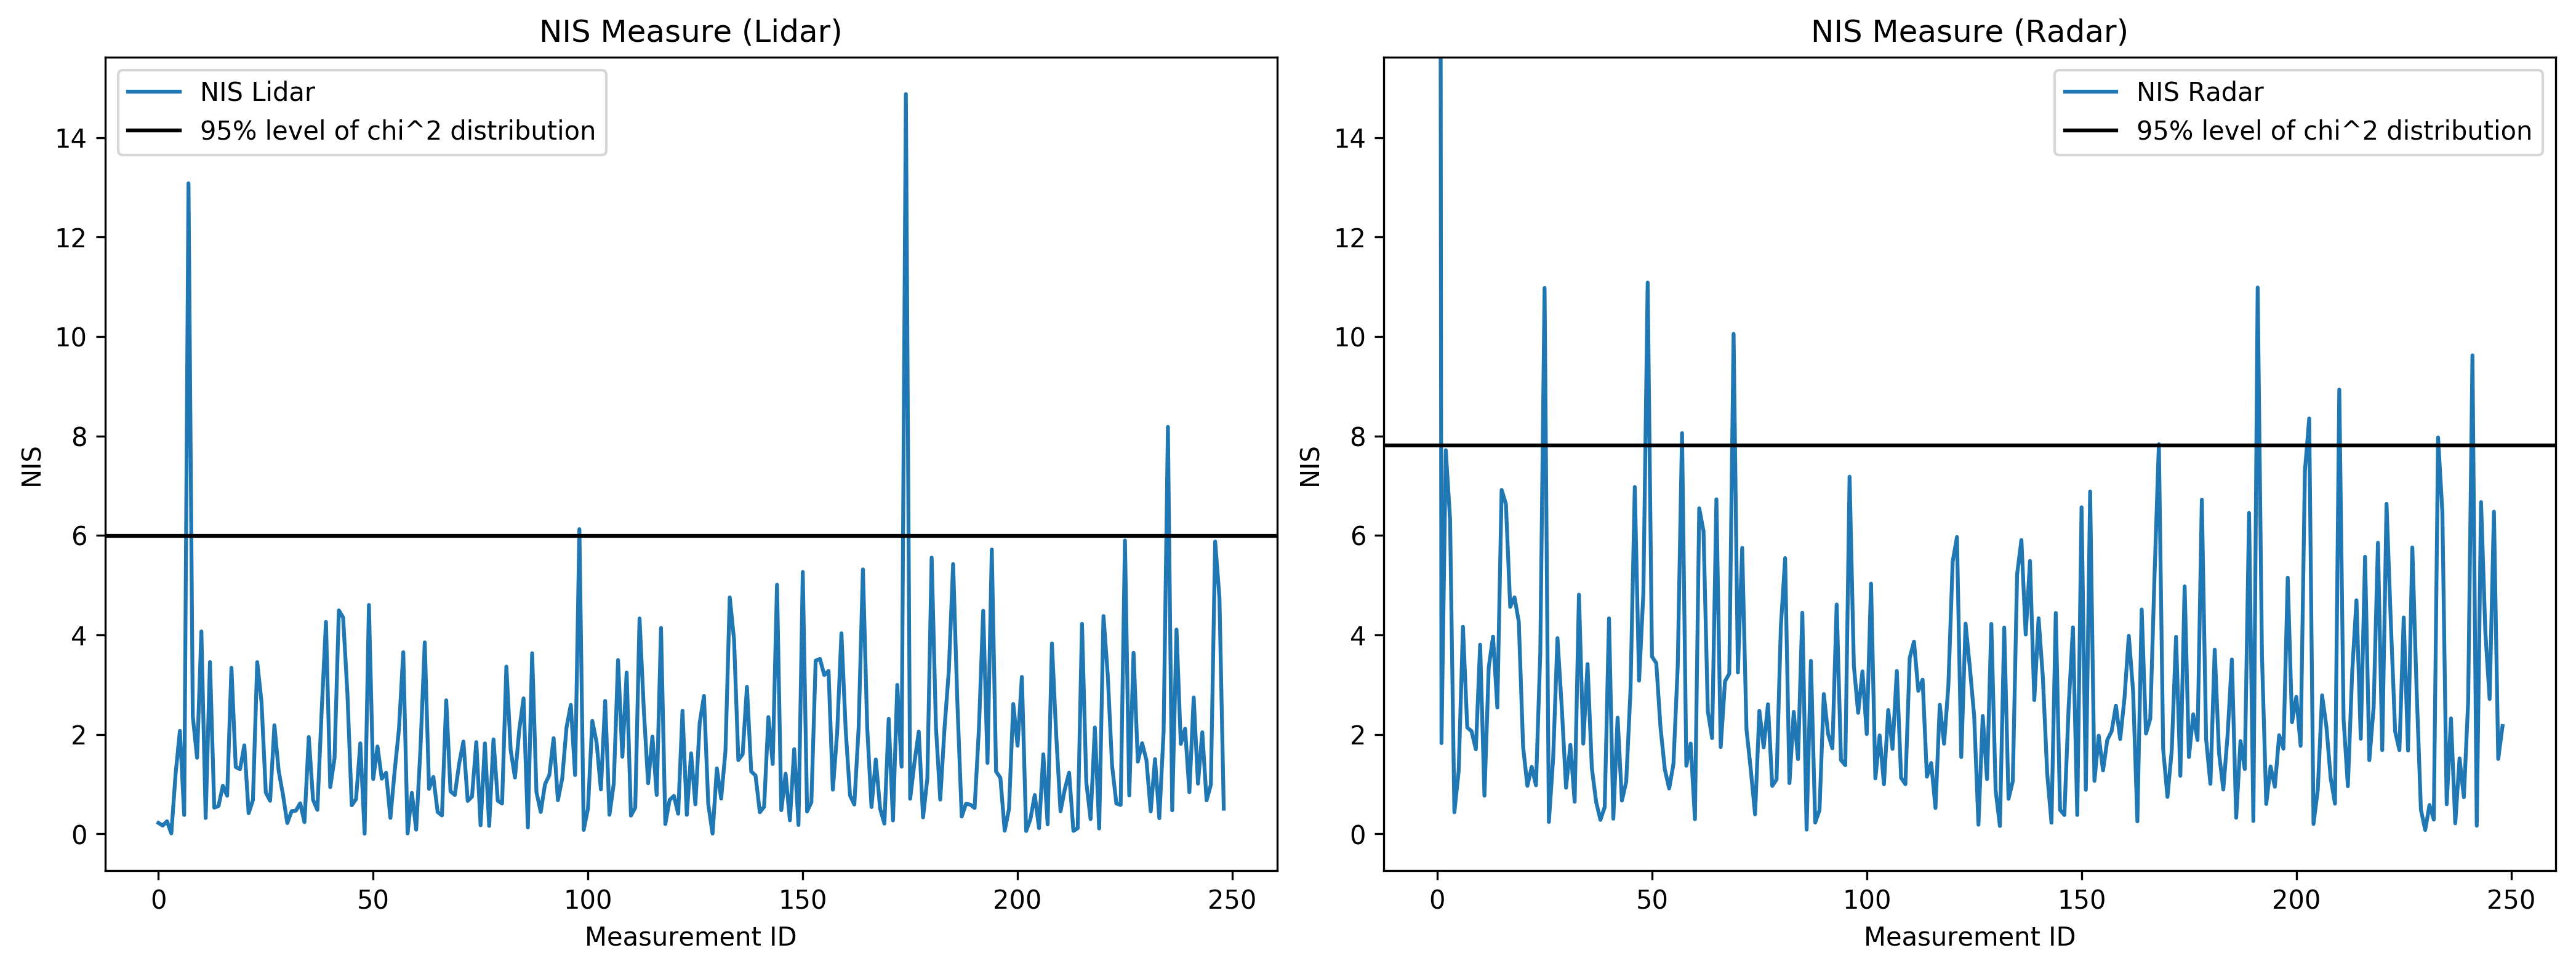

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=300)
f.tight_layout()

ax1.plot(nis_laser.index.values, nis_laser.iloc[:,0], label="NIS Lidar")
ax1.axhline(5.991, c=gt_color, label="95% level of chi^2 distribution")
ax1.set_xlabel(x_label)
ax1.set_ylabel("NIS")
ax1.set_title("NIS Measure (Lidar)")
ax1.legend()


ax2.plot(nis_radar.index.values, nis_radar.iloc[:,0], label="NIS Radar")
ax2.set_ylim(ax1.get_ylim())
ax2.axhline(7.815, c=gt_color, label="95% level of chi^2 distribution")
ax2.set_xlabel(x_label)
ax2.set_ylabel("NIS")
ax2.set_title("NIS Measure (Radar)")
ax2.legend()


plt.show()